# Linear Regression using Gradient Descent Method

#### Author: Jose Luis Milan

## Importing dataset

First, we import the data. The dataset we'll be working with was obtained from Kaggle and will be used for the analysis and modeling of this project.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("..\data\Salary_dataset.csv")
df.head()

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\jluis\AppData\Local\Temp\ipykernel_28688\3686758027.py:5: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("..\data\Salary_dataset.csv")


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


We notice that we have 30 non-null records in the YearsExperience and Salary columns.

Now, we will remove the columns that are not necessary for the data analysis.

In [30]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [31]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


## Exploratory Data Analysis (EDA)

Once we have the data imported, we begin exploratory data analysis. In this section, we will study the behavior of the data, how it is distributed, and more.

In [32]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


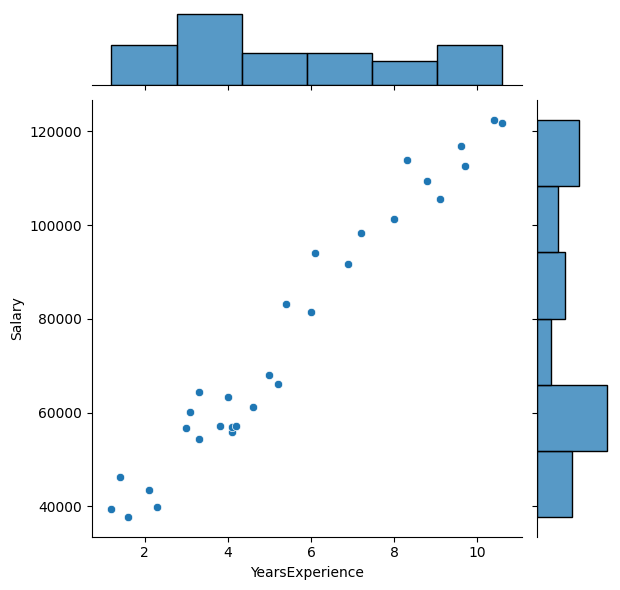

In [33]:
sns.jointplot(x='YearsExperience', y='Salary', data=df)

Looking at the scatter plot, we notice that the data show linear behavior.

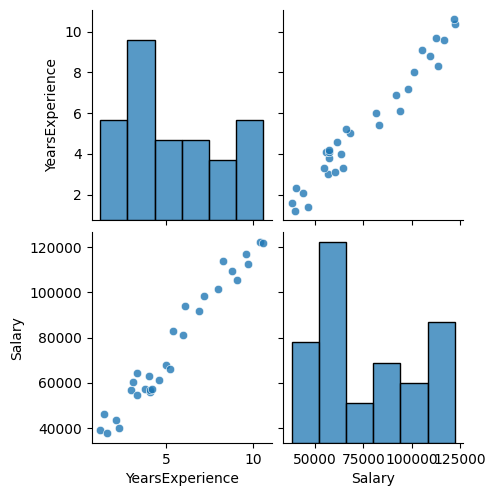

In [34]:
sns.pairplot(df, kind='scatter', plot_kws={'alpha': 0.8})

## Linear Regression Explanation

Simple linear regression is a parametric technique used to predict continuous dependent variables, given a set of independent variables.

Its equation is expressed in the form:

$$ \hat{y} = \theta_0 + \theta_1 x $$

Therefore, to calculate the coefficients $\theta_0$  and $\theta_1$, we will use the least squares equation.

$$ E = \frac{1}{n} \sum_{i=0}^{n} (y_i - \hat{y}_i)^2 = \frac{1}{n} \sum_{i=0}^{n} (y_i - (\theta_0 + \theta_1 x_i))^2 $$

We calculate the partial derivative with respect to $\theta_0$ and obtain:
$$ \frac{\partial E}{\partial\theta_0} = \frac{\partial}{\partial\theta_0} \left( \frac{1}{n} \sum_{i=0}^{n} (y_i - (\theta_0 + \theta_1 x_i))^2 \right) $$

$$ \frac{\partial E}{\partial\theta_0} = \frac{1}{n} \sum_{i=0}^{n} 2(y_i - (\theta_0 + \theta_1 x_i)) \cdot (-1) $$

$$ \frac{\partial E}{\partial\theta_0} = -\frac{2}{n} \sum_{i=0}^{n} (y_i - \hat{y}_i) $$

Then, we calculate the partial derivative with respect to $\theta_1$ and obtain:
$$ \frac{\partial E}{\partial\theta_1} = \frac{\partial}{\partial\theta_1} \left( \frac{1}{n} \sum_{i=0}^{n} (y_i - (\theta_0 + \theta_1 x_i))^2 \right) $$

$$ = \frac{1}{n} \sum_{i=0}^{n} 2(y_i - (\theta_0 + \theta_1 x_i)) \cdot x_i $$

$$ \frac{\partial E}{\partial\theta_1} = -\frac{2}{n} \sum_{i=0}^{n} x_i (y_i - \hat{y}_i) $$


## Parameter update in Gradient Descent

The equations show how the parameters $\theta_0$ and $\theta_1$ are updated in the **Gradient Descent** algorithm for linear regression:

$$
\theta_{0}^{(n+1)} = \theta_0^{(n)} - \alpha \frac{\partial E}{\partial \theta_0}
$$

$$
\theta_{1}^{(n+1)} = \theta_1^{(n)} - \alpha \frac{\partial E}{\partial \theta_1}
$$

### Explanation:
- $\theta_0, \theta_1$: Model parameters (intercept and slope).
- $\alpha$ (Learning Rate): Controls the step size during optimization. - Typical values: 0.001, 0.01, 0.1 (must be adjusted to avoid divergence or slow convergence).
- Partial derivatives of the error E (indicate the direction of greatest decline).


## Implementation in Python

In [10]:
def cost_function (theta_0, theta_1, data):
    total_error = 0
    for i in range(len(data)):
        x = data.iloc[i].YearsExperience
        y = data.iloc[i].Salary
        total_error += (y -(theta_0 + (theta_1 * x))) ** 2
    
    total_error / float(len(data))

In [11]:
def gradient_descent (theta0_now, theta1_now, data, lr):
    theta0_gradient = 0
    theta1_gradient = 0

    n = len(data)

    for i in range (n):
        x = data.iloc[i].YearsExperience
        y = data.iloc[i].Salary

        theta0_gradient += -(2/n) * (y - (theta0_now + (theta1_now * x)))
        theta1_gradient += -(2/n) * x * (y - (theta0_now + (theta1_now * x)))

    theta0 = theta0_now - (lr * theta0_gradient)
    theta1 = theta1_now - (lr * theta1_gradient)

    return theta0, theta1


In [39]:
#Training model

theta0 = 0
theta1 = 0
lr = 0.0001
epochs = 10000

for i in range(epochs):
    if i % 100 == 0:
        print(f'Epoch: {i}')
    theta0, theta1 = gradient_descent(theta0, theta1, df, lr)

print(theta0, theta1)

Epoch: 0
Epoch: 100
Epoch: 200
Epoch: 300
Epoch: 400
Epoch: 500
Epoch: 600
Epoch: 700
Epoch: 800
Epoch: 900
Epoch: 1000
Epoch: 1100
Epoch: 1200
Epoch: 1300
Epoch: 1400
Epoch: 1500
Epoch: 1600
Epoch: 1700
Epoch: 1800
Epoch: 1900
Epoch: 2000
Epoch: 2100
Epoch: 2200
Epoch: 2300
Epoch: 2400
Epoch: 2500
Epoch: 2600
Epoch: 2700
Epoch: 2800
Epoch: 2900
Epoch: 3000
Epoch: 3100
Epoch: 3200
Epoch: 3300
Epoch: 3400
Epoch: 3500
Epoch: 3600
Epoch: 3700
Epoch: 3800
Epoch: 3900
Epoch: 4000
Epoch: 4100
Epoch: 4200
Epoch: 4300
Epoch: 4400
Epoch: 4500
Epoch: 4600
Epoch: 4700
Epoch: 4800
Epoch: 4900
Epoch: 5000
Epoch: 5100
Epoch: 5200
Epoch: 5300
Epoch: 5400
Epoch: 5500
Epoch: 5600
Epoch: 5700
Epoch: 5800
Epoch: 5900
Epoch: 6000
Epoch: 6100
Epoch: 6200
Epoch: 6300
Epoch: 6400
Epoch: 6500
Epoch: 6600
Epoch: 6700
Epoch: 6800
Epoch: 6900
Epoch: 7000
Epoch: 7100
Epoch: 7200
Epoch: 7300
Epoch: 7400
Epoch: 7500
Epoch: 7600
Epoch: 7700
Epoch: 7800
Epoch: 7900
Epoch: 8000
Epoch: 8100
Epoch: 8200
Epoch: 8300
Epoc

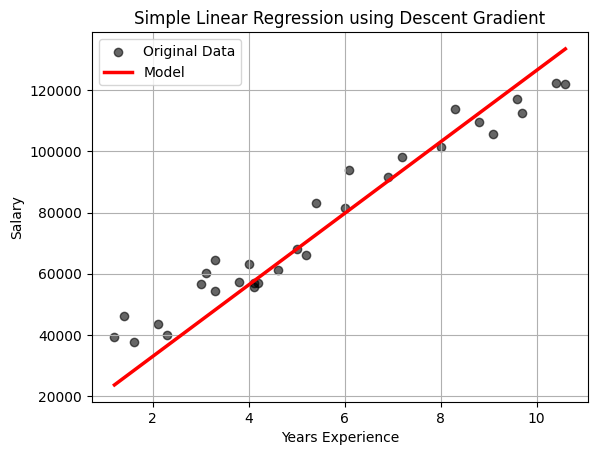

In [43]:
x = df['YearsExperience']
y = df['Salary']
y_pred = theta0 + theta1 * x

plt.scatter(x, y, color='black', alpha=0.6, label = 'Original Data')
plt.plot(x, y_pred, color='red', linewidth=2.5, label='Model')

plt.title('Simple Linear Regression using Descent Gradient')
plt.xlabel('Years Experience')
plt.ylabel('Salary')

plt.legend()
plt.grid()

plt.show()

Let's calculate R^2 from its definition:

$$ R^2 = 1 - \frac{SSE}{SST} $$

Where:

$$ \text{SSE} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
And 

$$ \text{SST} = \sum_{i=1}^{n} (y_i - \bar{y})^2 $$




In [44]:
#Error Sum of Squares
sse = ((y - y_pred) ** 2).sum()

# Error Sum of Squares Total
sst = ((y - y.mean()) ** 2).sum()

# R^2
r_squared = 1 - (sse / sst)
print(f'R^2: {r_squared}')

R^2: 0.8899641033154573
